In [2]:
# Import necessary Libraries

# For Data Analysis 
import pandas as pd 
import numpy as np

# For Data Visualization 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Pre-Processsung
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler


# Classifier Libraries
from sklearn.linear_model import SGDClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

# pip install xgboost
from xgboost import XGBClassifier 
from sklearn.svm import LinearSVC, SVC 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 
from sklearn.metrics import confusion_matrix

import warnings
warnings. filterwarnings ("ignore")

In [25]:
# first five data in the table
df = pd.read_csv(r"/Users/machi/Downloads/Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [6]:
# Check Size of data
df.shape

(7043, 21)

In [7]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# How far the numbers are from each other
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

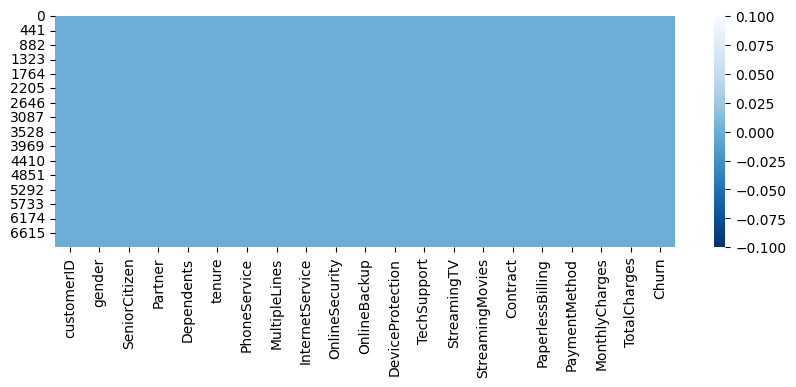

In [10]:
# check for missing values
print(df.isnull().sum())

#visualizing the missing data
plt.figure(figsize = (10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

# EDA - Univariate Analysis

In [11]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df = df.drop('customerID', axis=1)

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: xlabel='SeniorCitizen'>

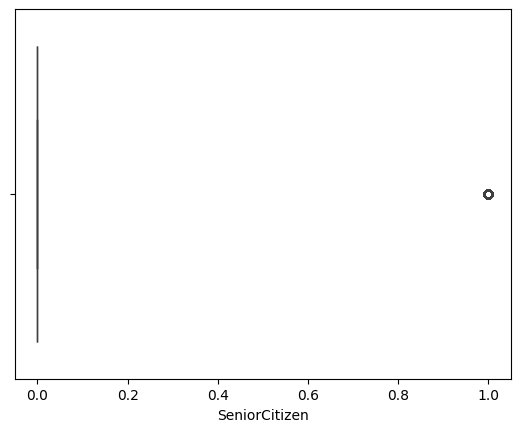

In [16]:
#check for outliers 
sns.boxplot(x=df["SeniorCitizen"])

<Axes: xlabel='tenure'>

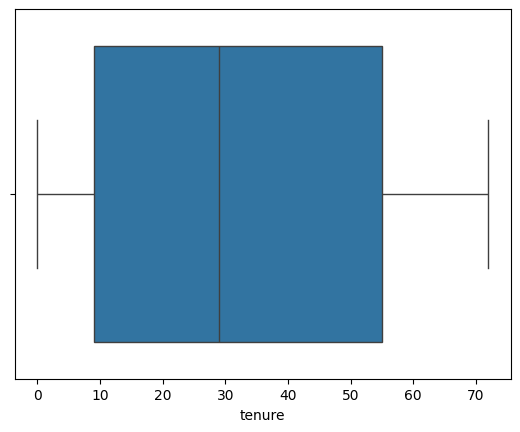

In [17]:
#check for outliers 
sns.boxplot(x=df["tenure"])

<Axes: xlabel='MonthlyCharges'>

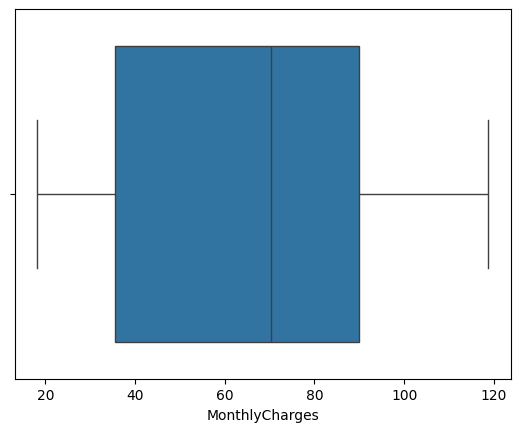

In [18]:
#check for outliers 
sns.boxplot(x=df["MonthlyCharges"])

Text(0.5, 1.0, 'Distribution of Patient gender')

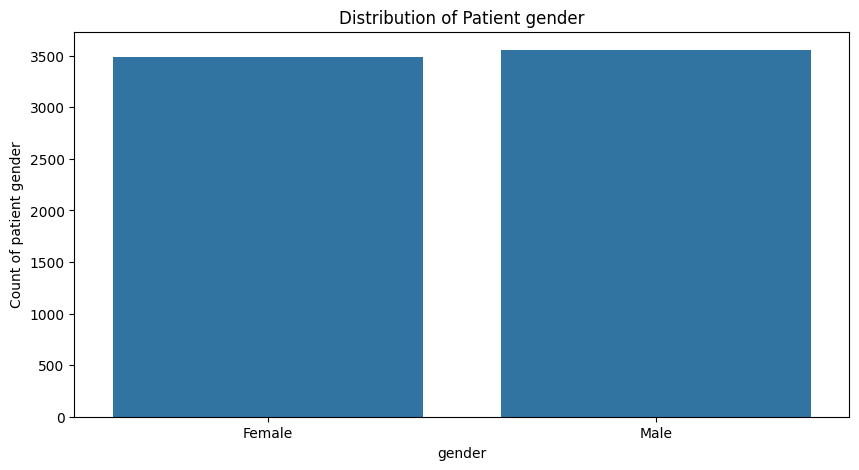

In [22]:
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df)
plt.xlabel('gender')
plt.ylabel('Count of patient gender') 
plt.title('Distribution of Patient gender')

from the visualization above, the male population is slightly more than the female

Text(0.5, 1.0, 'Distribution of PhoneService')

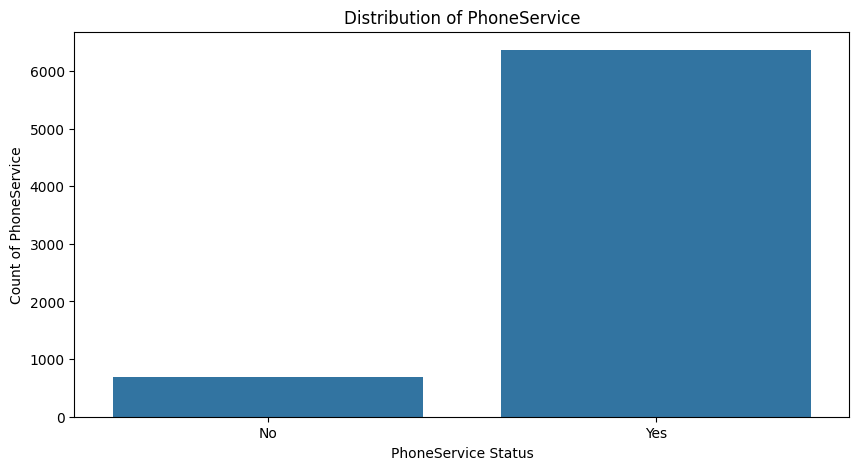

In [23]:
# Investigating the group of customers
plt.figure(figsize = (10, 5))
sns.countplot(x='PhoneService', data=df)
plt.xlabel('PhoneService Status')
plt.ylabel('Count of PhoneService')
plt.title('Distribution of PhoneService')

From the figure above, most of the customers (Yes) have phone service

Text(0.5, 1.0, 'Distribution of InternetService')

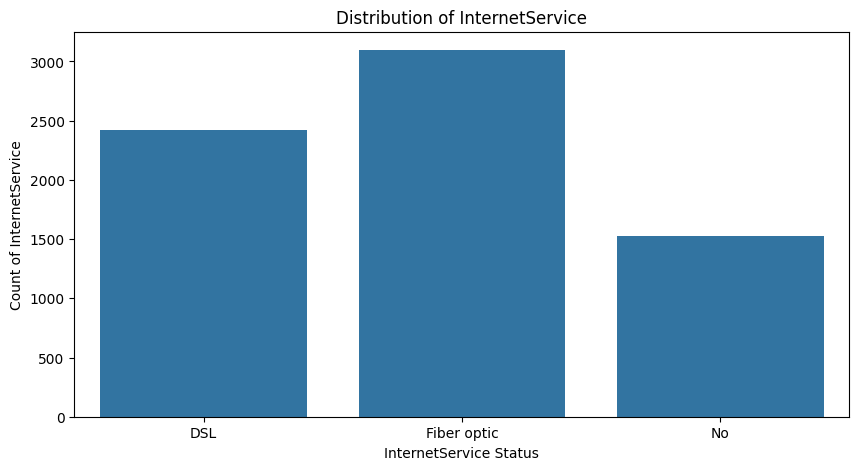

In [24]:
# Investigating the group of customers
plt.figure(figsize = (10, 5))
sns.countplot(x='InternetService', data=df)
plt.xlabel('InternetService Status')
plt.ylabel('Count of InternetService')
plt.title('Distribution of InternetService')

from the figure above, customers use Fiber optic InternetService more, followed by DSL. 
Then'NO' meaning the remaining customers use neither internet services.

Text(0.5, 1.0, 'Distribution of Contract')

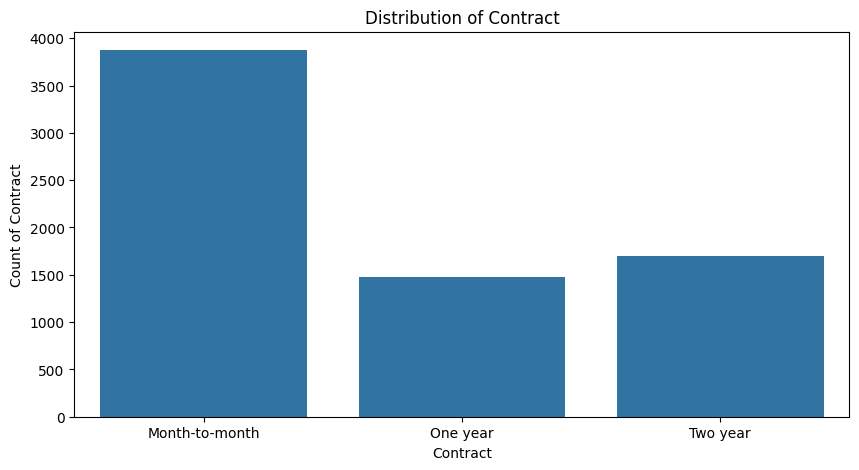

In [26]:
# Investigating the group of customers
plt.figure(figsize = (10, 5))
sns.countplot(x='Contract', data=df)
plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Distribution of Contract')

from the figure above, most of the customers are in the month-to-month contract, followed by the ones in
Two year contract, then one year contract.

Text(0.5, 1.0, 'Distribution of Churn')

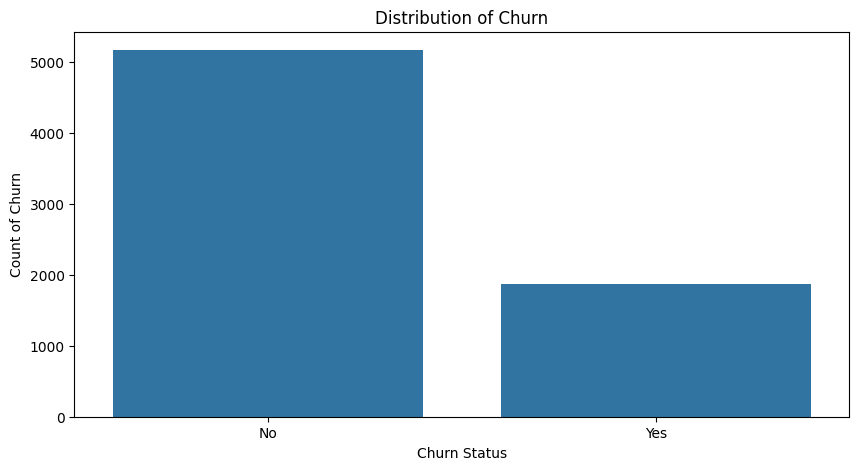

In [27]:
# Investigating the group of customers
plt.figure(figsize = (10, 5))
sns.countplot(x='Churn', data=df)
plt.xlabel('Churn Status')
plt.ylabel('Count of Churn')
plt.title('Distribution of Churn')

from the figure above, the 'No' represents the customers that haven't churned, which is larger than the ones who
have (Yes).

Text(0.5, 1.0, 'Distribution of gender')

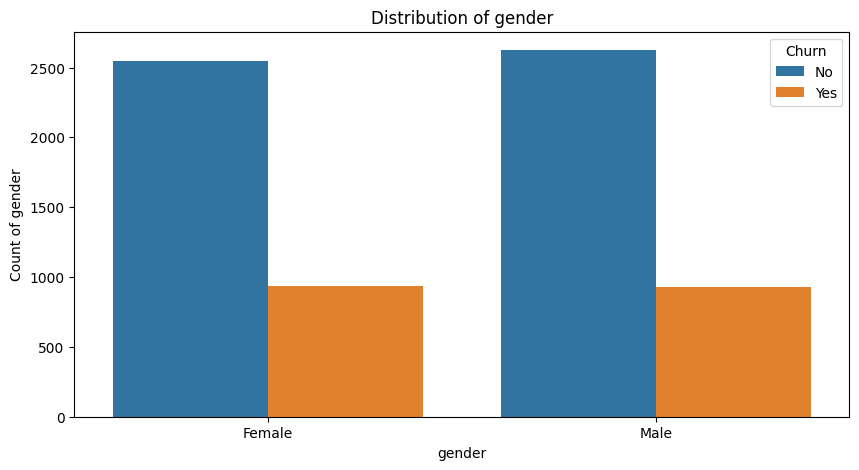

In [38]:
# Investigating of gender by churn
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Distribution of gender')

This visualization shows the gender with churn(Yes) and the gender that has (No) churn. It's equal, from the figure above.

Text(0.5, 1.0, 'Distribution of Count of MultipleLines')

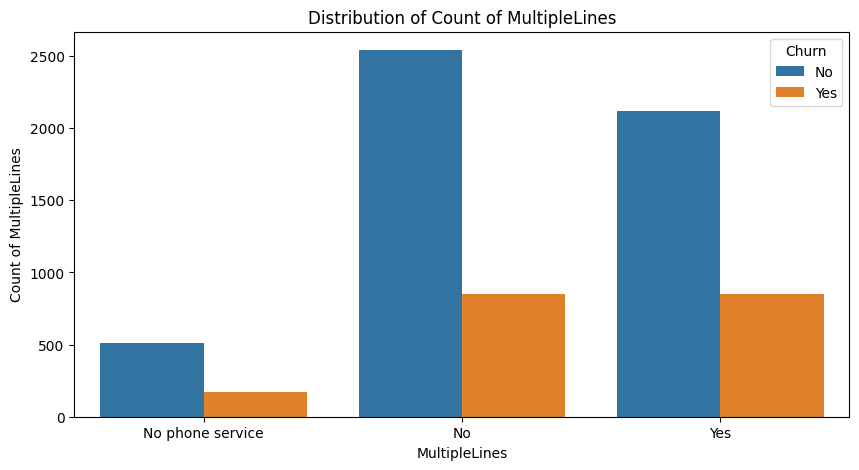

In [39]:
# Investigating the use of multiple lines by customer, and the rate of churn
plt.figure(figsize = (10, 5))
sns.countplot(x='MultipleLines', data=df, hue='Churn')
plt.xlabel('MultipleLines')
plt.ylabel('Count of MultipleLines')
plt.title('Distribution of Count of MultipleLines')

from the data visualization above, blue represents customers with 'No' churn and 'Yes' represents customers with churn

Text(0.5, 1.0, 'Distribution of Count of TechSupport')

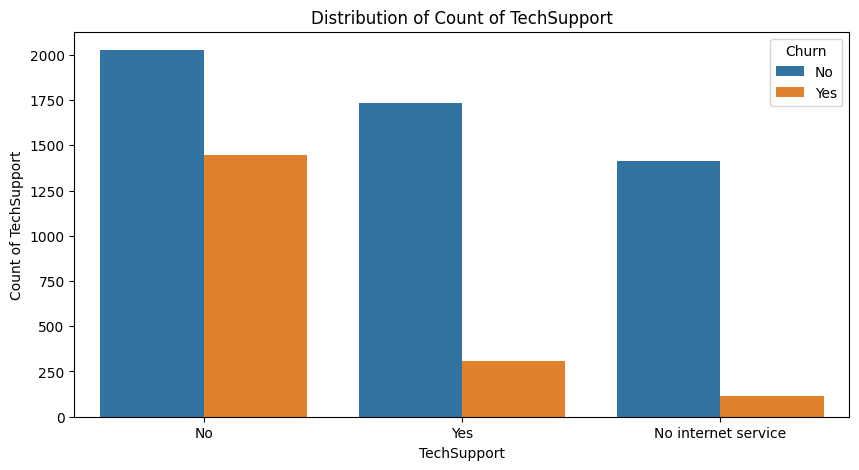

In [40]:
# Investigating the use of multiple lines by customer, and the rate of churn
plt.figure(figsize = (10, 5))
sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.xlabel('TechSupport')
plt.ylabel('Count of TechSupport')
plt.title('Distribution of Count of TechSupport')

from the data visualization above, blue represents customers with 'No' churn and 'Yes' represents customers with churn
and upto 1750 customers with no tech support have 'No' churn and around 1255 customers with no tech support also has 'No' churn.
up to 1500 customers with tech support has 'No' churn. And 250 customers with tech support has 'Yes' churn.
1255 customers with no internet service has 'No' churn, and around 200 customer with no internet service has 'Yes' churn.

In [41]:
print(df.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [46]:
categorical_data = df.select_dtypes(include="object")
categorical_data.head()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No
2,3668-QPYBK,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes
3,7795-CFOCW,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),1840.75,No
4,9237-HQITU,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes


In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
from sklearn.preprocessing import LabelEncoder

# Encode

In [44]:
encoder = LabelEncoder()

In [48]:
for column_name in categorical_data:
    print (column_name)

customerID
gender
Partner
Dependents
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
TotalCharges
Churn


In [49]:
#encode
for column_name in categorical_data:
    df[column_name] = encoder.fit_transform(df[column_name])

In [50]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


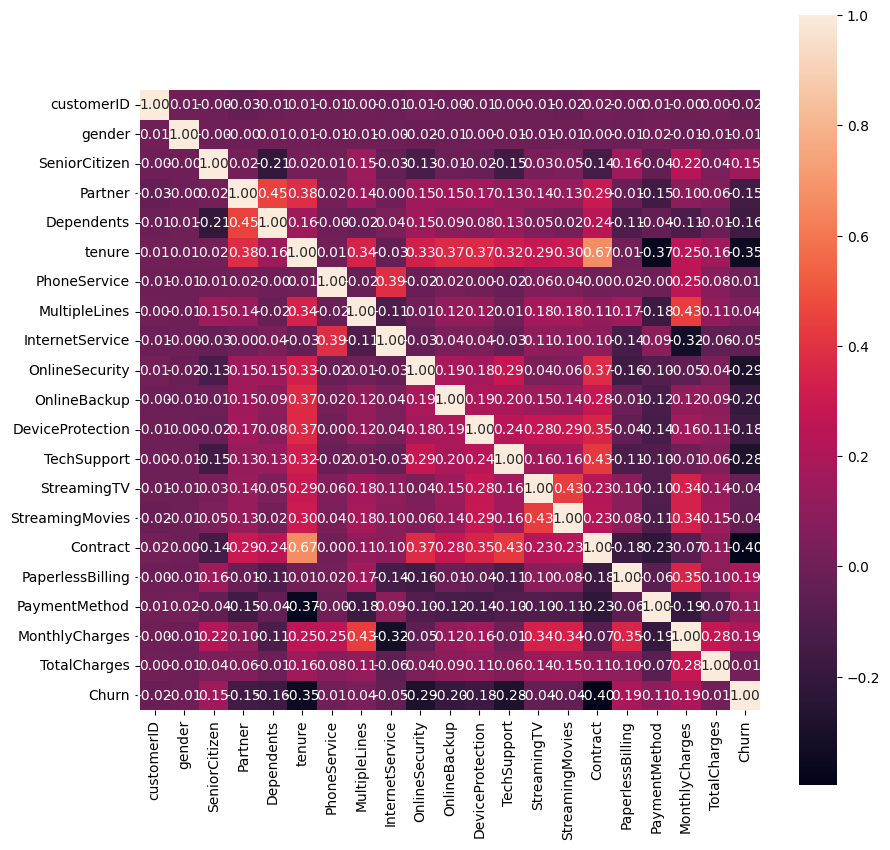

In [51]:
#correlation between churn and other variables in the dataset
plt.figure(figsize = (10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                 annot_kws={'size':10})


In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [53]:
df.drop(columns=['customerID'], inplace=True)

In [61]:
# create a copy of the data (exclude Churn/label)
df1 = df[['gender',	'SeniorCitizen',	'Partner',	'Dependents',	'tenure',	'PhoneService',	'MultipleLines',	'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	'StreamingTV',	'StreamingMovies',	'Contract',	'PaperlessBilling',	'PaymentMethod',	'MonthlyCharges',	'TotalCharges']]
label = df[['Churn']]

In [67]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [75]:
label.head(10)

,Churn
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,0
8,1
9,0


In [64]:
df1.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
dtype: object

# Machine Learning

In [68]:
# split the dataset into training and testing sets - x = Questions, y = Answers
x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [70]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
ly_pred = logreg.predict(x_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Regression
Accuracy: 0.8140525195173882
Precision: 0.6784565916398714
Recall: 0.5656836461126006
F1-score: 0.6169590643274854
AUC-ROC: 0.7345792747937521


In [71]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,24.80,2044
2715,1,0,0,0,41,1,2,2,1,1,1,1,1,1,0,1,0,25.25,6522
3825,0,0,1,1,52,1,0,2,1,1,1,1,1,1,2,0,3,19.35,67
1807,0,0,0,0,1,1,0,1,0,0,2,0,0,0,0,0,2,76.35,5822
132,1,0,0,0,67,1,0,0,0,0,0,2,0,0,2,0,0,50.55,2837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,0,0,1,0,64,1,0,0,0,2,2,2,0,2,2,1,3,68.30,3716
315,1,0,1,1,51,1,2,1,2,2,0,2,2,2,1,0,1,110.05,4697
2439,1,0,1,1,17,1,0,2,1,1,1,1,1,1,1,0,0,19.90,2856
5002,0,0,1,1,69,0,1,0,2,0,2,0,0,2,2,1,1,43.95,2556


In [72]:
print(ly_pred[:10])

[1 0 0 1 0 0 0 0 0 0]


In [73]:
print(y_test[:10])

      Churn
185       1
2715      0
3825      0
1807      1
132       0
1263      1
3732      0
1672      0
811       1
2526      1


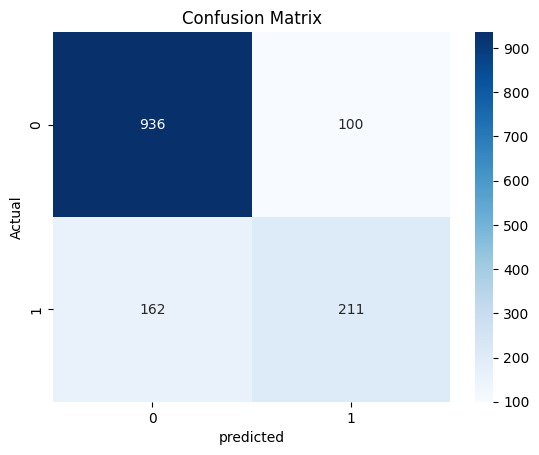

In [76]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

#Visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [79]:
# Using for loop to loop through the classifiers
classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Classifier'],
               [SGDClassifier(), 'SGDC Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(), 'Naive Rayes'],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(), "Logistic Regression"]
              ]  

In [80]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                feature_weights=None, gamma=None, grow_policy=None,
                importance_type=None, interaction_constraints=None,
                learning_rate=None, max_bin=None, max_cat_threshold=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, multi_strategy=None, n_estimators=None,
                n_jobs=None, num_parallel_tree=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Classifier'],
 [SGDClassifier(), 'SGDC Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Rayes'],
 [Decision

In [82]:
# Loop through multiple models
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    p_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = ([str(round(a_score*100, 2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(r_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')
    

In [83]:
# accuracy
acc_list

{'XGB Classifier': ['78.57%'],
 'Random Forest': ['79.49%'],
 'K-Nearest Classifier': ['75.8%'],
 'SGDC Classifier': ['76.93%'],
 'SVC': ['73.53%'],
 'Naive Rayes': ['75.87%'],
 'Decision tree': ['72.75%'],
 'Logistic Regression': ['81.41%']}

In [84]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,70.41%,69.5%,64.93%,63.55%,50.0%,76.38%,64.05%,73.46%


In [85]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,53.08%,48.26%,41.82%,35.12%,0.0%,77.48%,45.58%,56.57%


In [86]:
print("Roc score")
s4 = pd.DataFrame(roc_list)
s4.head()

Roc score


,XGB Classifier,Random Forest,K-Nearest Classifier,SGDC Classifier,SVC,Naive Rayes,Decision tree,Logistic Regression
0,53.08%,48.26%,41.82%,35.12%,0.0%,77.48%,45.58%,56.57%


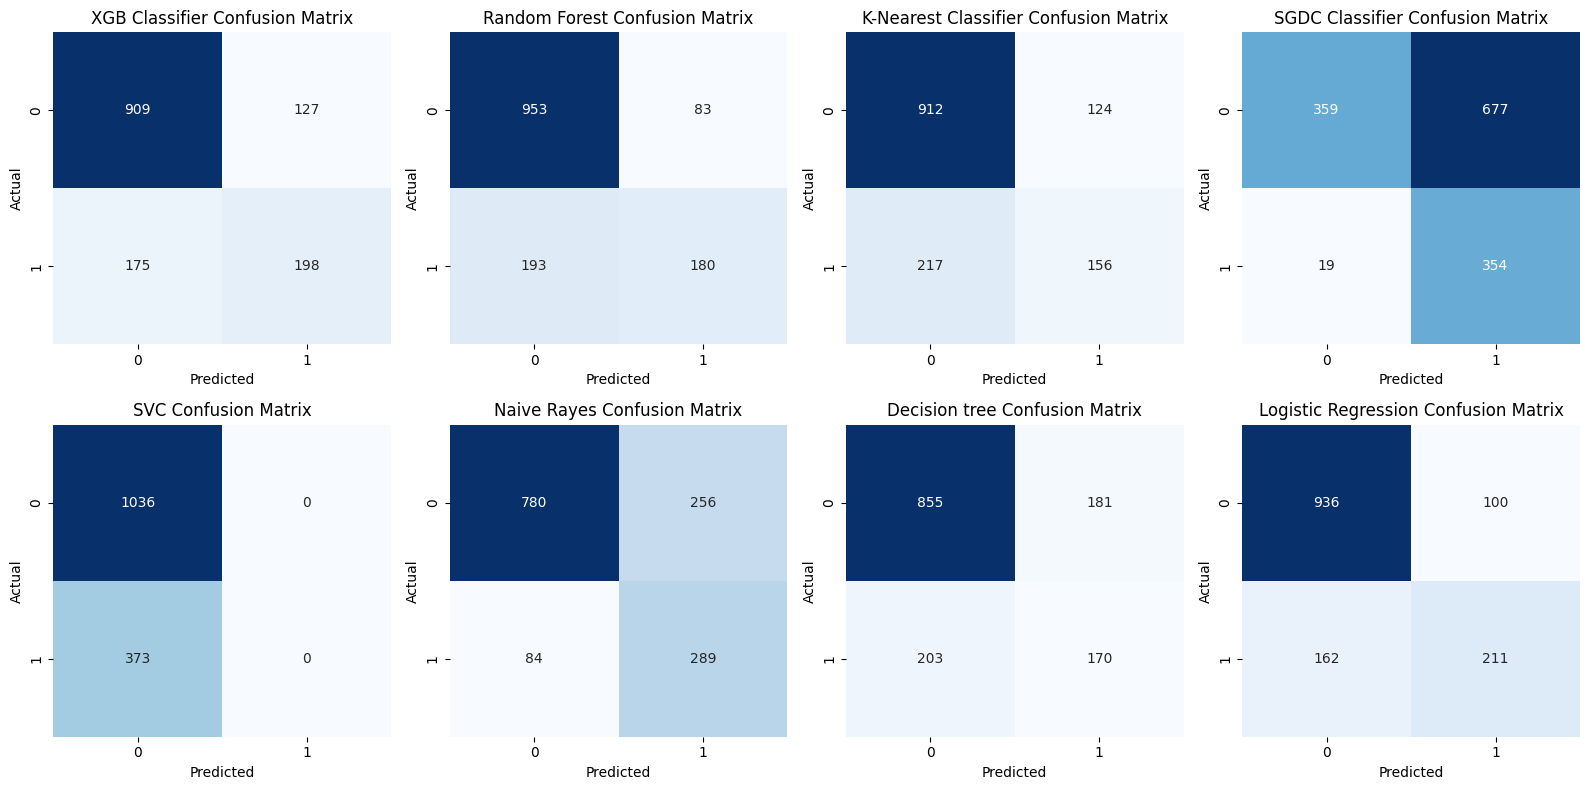

                      Accuracy  Precision  Recall  ROC AUC
XGB Classifier           78.57      60.92   53.08    70.41
Random Forest            80.41      68.44   48.26    70.12
K-Nearest Classifier     75.80      55.71   41.82    64.93
SGDC Classifier          50.60      34.34   94.91    64.78
SVC                      73.53       0.00    0.00    50.00
Naive Rayes              75.87      53.03   77.48    76.38
Decision tree            72.75      48.43   45.58    64.05
Logistic Regression      81.41      67.85   56.57    73.46


In [87]:
# Initialize lists to store the scores
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

# Initialize the plot for confusion matrices
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  # Adjust the layout based on number of classifiers
axes = axes.flatten()  # Flatten the 2D array to make indexing easier

# Loop through the classifiers
for idx, classifier in enumerate(classifiers):
    model = classifier[0]
    model_name = classifier[1]

    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    pred = model.predict(x_test)

    # Calculate performance metrics
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    # Store metrics in dictionaries
    acc_list[model_name] = round(a_score * 100, 2)
    precision_list[model_name] = round(p_score * 100, 2)
    recall_list[model_name] = round(r_score * 100, 2)
    roc_list[model_name] = round(roc_score * 100, 2)

    # Plot the confusion matrix
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[idx]), 

    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

    
    axes[idx].set_title(f"{model_name} Confusion Matrix")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Accuracy': acc_list,
    'Precision': precision_list,
    'Recall': recall_list,
    'ROC AUC': roc_list
})

# Print the results DataFrame
print(results_df)

# Final Thoughts

I compared models including Logistic Regression, Random Forest, XGBoost, Naive Bayes, and more — using key metrics like Accuracy, Precision, Recall, and ROC AUC.

While Logistic Regression achieved the highest accuracy (81.41%), Naive Bayes demonstrated the best recall (77.48%) and ROC AUC (76.38%), making it the most effective model for capturing churners, which aligns with the project’s objective. Since false negatives (missed churners) can be more costly than false positives in this context, a model with higher recall is preferred.

Therefore, Naive Bayes was selected as the final model.